In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#load the content
df = pd.read_csv('appliance_energy.csv')
#displays the first few rows for understanding
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


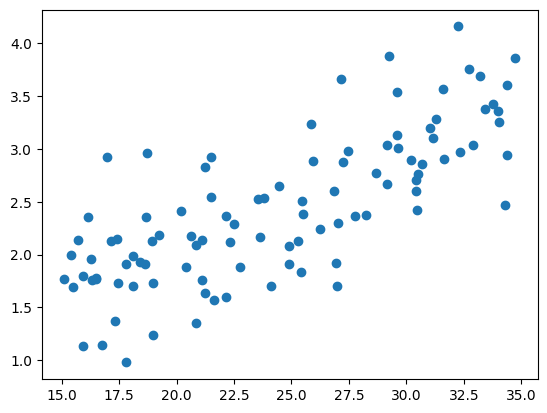

In [ ]:
plt.scatter(df['Temperature (°C)'],df['Energy Consumption (kWh)'])
plt.show()

In [ ]:
#check for missing values
print(df.isnull().sum())


Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [ ]:
#independent variable
x = df[['Temperature (°C)']]
y = df['Energy Consumption (kWh)']

In [ ]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Corrected the order of returned variables

In [ ]:
x_train.head()

,Temperature (°C)
55,33.437485
88,32.744255
26,18.993476
42,15.687770
69,34.737739


In [ ]:
#create a linear regression model
model = LinearRegression()
#train the model
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_test.head()

,Energy Consumption (kWh)
83,1.955394
53,3.037917
70,2.426014
45,2.370351
44,2.413076


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
2.25 -  2.29

-0.040000000000000036

In [ ]:
print("Slope: ", model.coef_)
print("y-Intercept: ", model.intercept_)

Slope:  [0.08996618]
y-Intercept:  0.22196391661907633


In [ ]:
#y = mx+c
print(model.coef_, model.intercept_)
y_pred = model.predict(x_test)

[0.08996618] 0.22196391661907633


In [ ]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
r2 = r2_score(y_test, y_pred)
print(f"R Squared: {r2}")

Mean Squared Error:  0.16342487842925055
R Squared: 0.6119478445218713


Text(0, 0.5, 'Energy Consumption (kWh)')

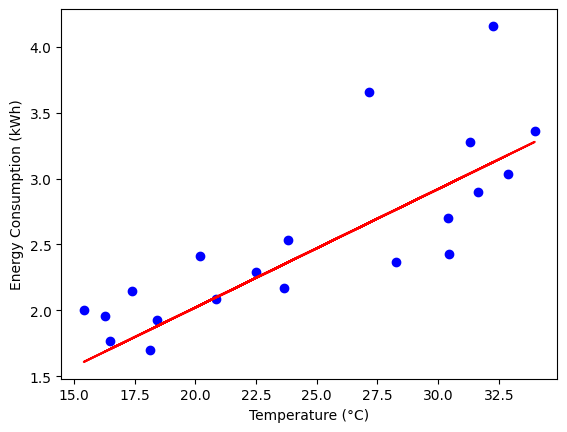

In [ ]:
plt.scatter(x_test, y_test, color='blue', label = 'Test Data')  #actual data
plt.plot(x_test, y_pred, color='red', label = 'Linear Regression') #preicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')

In [ ]:
import joblib
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

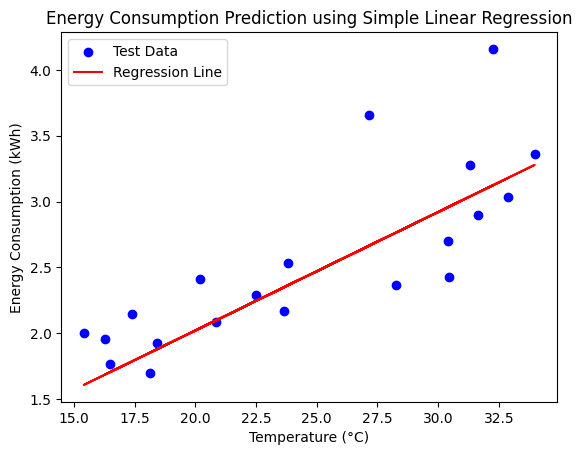

In [ ]:
# Plot the test data and regression line
plt.scatter(x_test, y_test, color='blue', label='Test Data')  # Actual data, changed X_test to x_test
plt.plot(x_test, y_pred, color='red', label='Regression Line')  # Predicted data, changed X_test to x_test
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [ ]:
model = joblib.load('appliance_energy_model.pkl')

In [ ]:
temp = np.array([[22.49]])

In [ ]:
prediction = model.predict(temp)
print("Predicted energy consumption:",prediction)

Predicted energy consumption: [2.24530337]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
